# Якиманский А В

Загружена история обучения для модели resnet18
Загружена история обучения для модели vgg16
Загружена история обучения для модели inception
Загружена история обучения для модели densenet


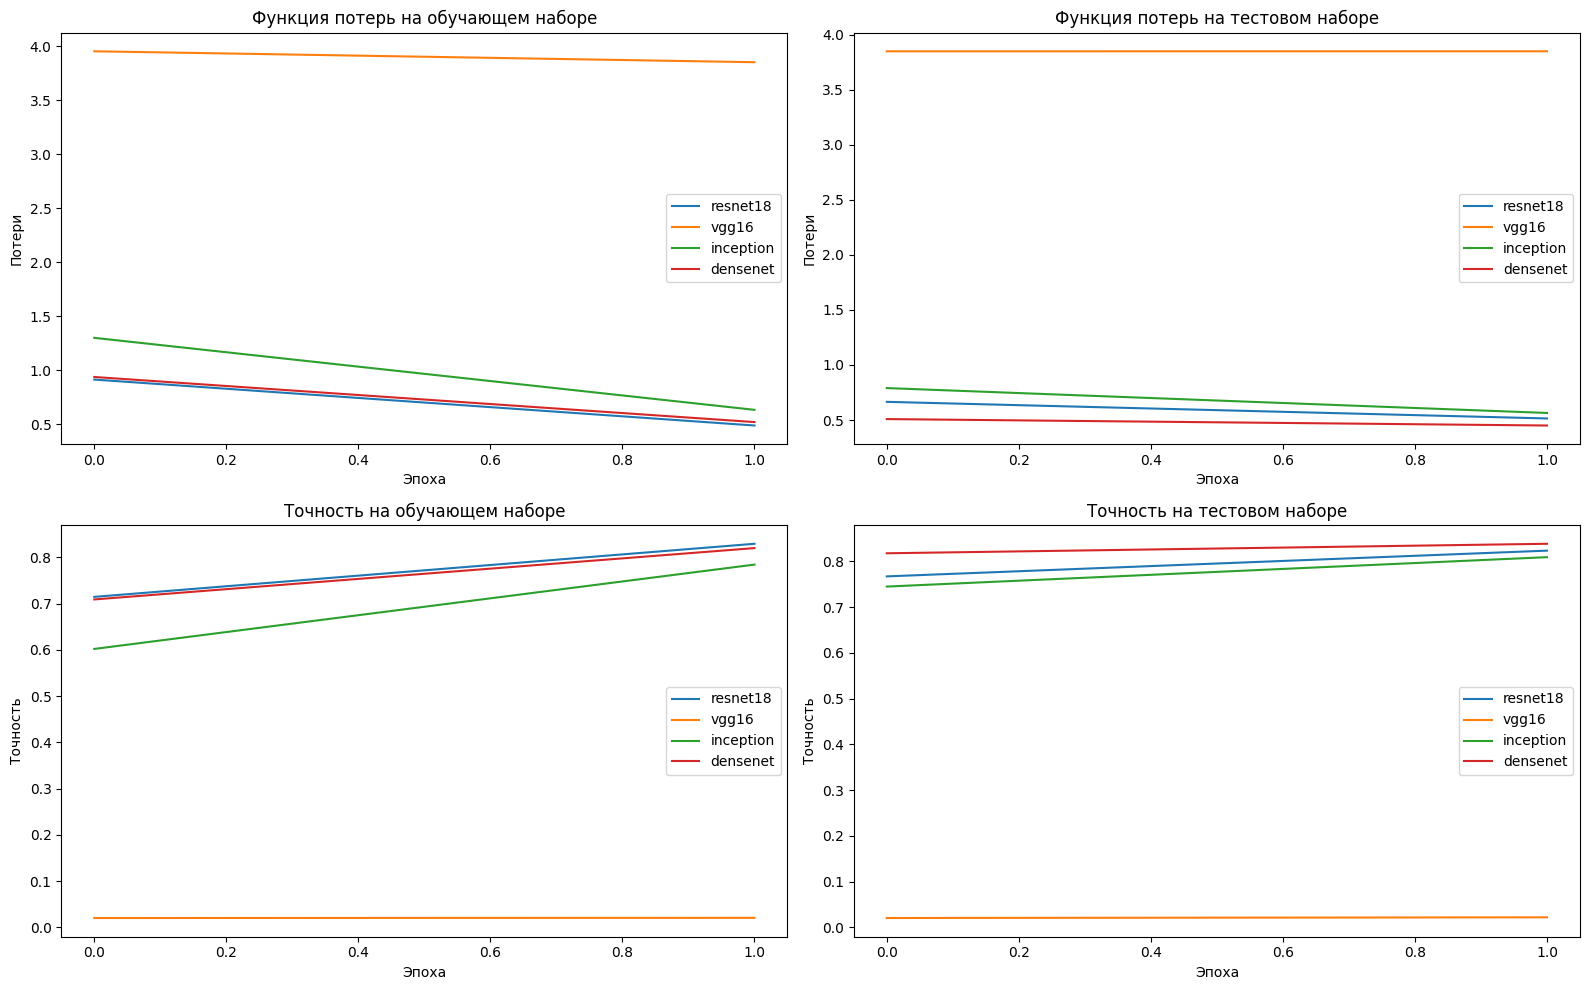


Таблица результатов:
------------------------------------------------------------------------------------------
Модель          | Финальная потеря (трейн)  | Финальная потеря (тест)   | Точность (тест)
------------------------------------------------------------------------------------------
resnet18        | 0.4905                    | 0.5142                    | 0.8233         
vgg16           | 3.8502                    | 3.8508                    | 0.0220         
inception       | 0.6354                    | 0.5641                    | 0.8090         
densenet        | 0.5223                    | 0.4501                    | 0.8383         
------------------------------------------------------------------------------------------

Лучшая модель по точности на тестовом наборе: densenet с точностью 0.8383

Сравнение моделей завершено. Результаты сохранены в model_comparison_results.png


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

# Список имен моделей
model_names = ["resnet18", "vgg16", "inception", "densenet"]

# Загрузка данных истории обучения
model_histories = {}

for model_name in model_names:
    history_file = f"{model_name}_history.json"
    if os.path.exists(history_file):
        with open(history_file, 'r') as f:
            model_histories[model_name] = json.load(f)
            print(f"Загружена история обучения для модели {model_name}")
    else:
        print(f"Внимание: файл истории для модели {model_name} не найден")

# Проверка, что есть данные для отображения
if not model_histories:
    print("Не найдены файлы с историей обучения. Сначала запустите обучение моделей.")
    exit()

# Визуализация результатов
plt.figure(figsize=(16, 10))

# График функции потерь на обучающем наборе
plt.subplot(2, 2, 1)
for model_name, history in model_histories.items():
    plt.plot(history['train_loss'], label=model_name)
plt.title('Функция потерь на обучающем наборе')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

# График функции потерь на тестовом наборе
plt.subplot(2, 2, 2)
for model_name, history in model_histories.items():
    plt.plot(history['test_loss'], label=model_name)
plt.title('Функция потерь на тестовом наборе')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

# График точности на обучающем наборе
plt.subplot(2, 2, 3)
for model_name, history in model_histories.items():
    plt.plot(history['train_acc'], label=model_name)
plt.title('Точность на обучающем наборе')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

# График точности на тестовом наборе
plt.subplot(2, 2, 4)
for model_name, history in model_histories.items():
    plt.plot(history['test_acc'], label=model_name)
plt.title('Точность на тестовом наборе')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.savefig('model_comparison_results.png')
plt.show()

# Создание таблицы результатов
print("\nТаблица результатов:")
print("-" * 90)
print(f"{'Модель':<15} | {'Финальная потеря (трейн)':<25} | {'Финальная потеря (тест)':<25} | {'Точность (тест)':<15}")
print("-" * 90)

for model_name, history in model_histories.items():
    train_loss = history['train_loss'][-1]
    test_loss = history['test_loss'][-1]
    test_acc = history['test_acc'][-1]
    print(f"{model_name:<15} | {train_loss:<25.4f} | {test_loss:<25.4f} | {test_acc:<15.4f}")

print("-" * 90)

# Определение лучшей модели по точности на тестовых данных
best_model = None
best_acc = -1

for model_name, history in model_histories.items():
    test_acc = history['test_acc'][-1]
    if test_acc > best_acc:
        best_acc = test_acc
        best_model = model_name

print(f"\nЛучшая модель по точности на тестовом наборе: {best_model} с точностью {best_acc:.4f}")
print("\nСравнение моделей завершено. Результаты сохранены в model_comparison_results.png") 